<a href="https://colab.research.google.com/github/pranayDgr8/StockSentiment-Analysis/blob/main/stockSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Sentiment Analysis using headlines**



Pranaydeep Mayank(19BAI1026)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/BI/Data.csv', encoding = "ISO-8859-1")
df.head(20)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
5,2000-01-10,1,Fifth round draw,BBC unveils secret weapon in ratings war: Sout...,Second Division round-up,European round-up,Third Division round-up,Welfare could claim Killie tie as Caley Thistl...,Ferguson puts brave face on Rio meltdown,Southgate in striking form to pre-empt penalties,...,Time Warner and AOL to merge,Keep up,Waging global war,"Desktop icons, No 1: The Qwerty keyboard",The sec's files,The low down: Workplace bullying,Met 'not equipped' to solve murders,Tranmere tie will not be replayed,Rebel attacks take toll on Russia,Met lent stopped car to Lawrence
6,2000-01-11,1,Man Utd 2 - 0 South Melbourne,How North Atlantic drift could carry away Old ...,Buoyant BBC to show Brazil final live,Tranmere given all-clear in the Cup,United sit poorly with the Doc,Queen's Park peril clouds Hampden future,Waugh hits out at Shoaib reprieve,Knight makes case for Butcher's place,...,I'd like that in writing,Split vote may offer 

In [ ]:
df.shape #4101 dates

(4101, 27)

In [ ]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: stocks drop || 1: stocks rise)')

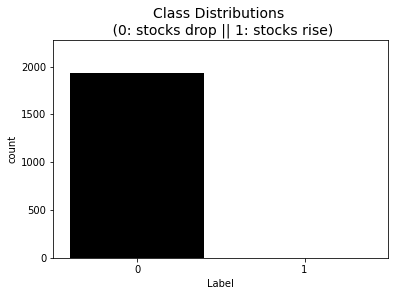

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
colors = ["0", "1"]
sns.countplot('Label', data=df, palette=colors)
plt.title('Class Distributions \n (0: stocks drop || 1: stocks rise)', fontsize=14)

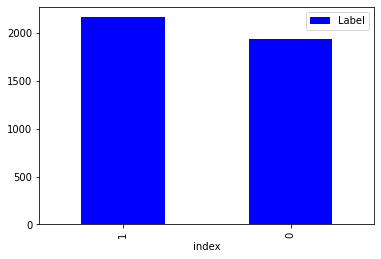

In [ ]:
df['Label'].value_counts().reset_index().plot(kind='bar', x='index', y='Label', color='blue')

from the above graph we can say that dataset is quite balanced

### Removing punctuations

In [ ]:

data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

data_tst=test.iloc[:,2:27]
data_tst.replace("[^a-zA-Z]"," ",regex=True, inplace=True)



### Renaming column names for ease of access

In [ ]:

list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [ ]:
list2= [i for i in range(25)]
new_Index2=[str(i) for i in list2]
data_tst.columns= new_Index2
data_tst.head(5)

for index in new_Index2:
    data_tst[index]=data_tst[index].str.lower()
data.head(1)

' '.join(str(x) for x in data_tst.iloc[1,0:25])

headlines_tst = []
for row in range(0,len(data_tst.index)):
    headlines_tst.append(' '.join(str(x) for x in data_tst.iloc[row,0:25]))

headlines_tst[0]
len(headlines_tst)
#len(headlines)

378

### Convertng headlines to lower case

In [ ]:

for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [ ]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

### Aggregating all the headlines together belonging to same date

In [ ]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

#Bag of words+MODELS
### implementing BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:

countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [ ]:
traindataset

<3975x584289 sparse matrix of type '<class 'numpy.int64'>'
	with 1075856 stored elements in Compressed Sparse Row format>

### Building RandomForest Classifier

In [ ]:

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindataset,train['Label'])



MultinomialNB()

### Predict for the Test Dataset

In [ ]:

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions_forest = randomclassifier.predict(test_dataset)

### Accuracy Check

In [ ]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')  
  
  

    
    
   

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

[[141  45]
 [  7 185]]
0.8624338624338624
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       186
           1       0.80      0.96      0.88       192

    accuracy                           0.86       378
   macro avg       0.88      0.86      0.86       378
weighted avg       0.88      0.86      0.86       378

Confusion matrix, without normalization


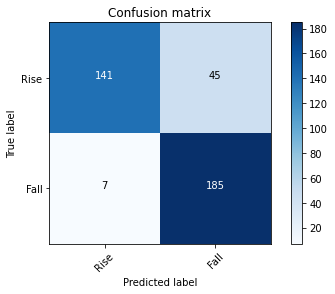

In [ ]:
#Random Forest
import numpy as np
matrix=confusion_matrix(test['Label'],predictions_forest)
print(matrix)
score=accuracy_score(test['Label'],predictions_forest)
print(score)
report=classification_report(test['Label'],predictions_forest)
print(report)
plot_confusion_matrix(matrix, classes=['Rise', 'Fall'])


[[138  48]
 [ 10 182]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378

Confusion matrix, without normalization


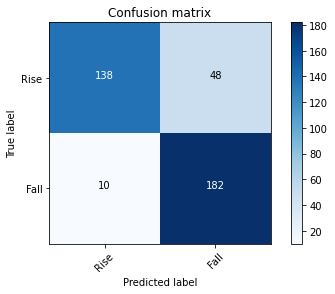

In [ ]:
#multinimoialNB
import numpy as np
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Rise', 'Fall'])

### **PassiveAggresive Model**

[[159  27]
 [ 33 159]]
0.8412698412698413
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       186
           1       0.85      0.83      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378

Confusion matrix, without normalization


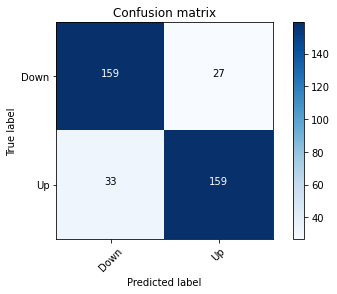

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
pa.fit(traindataset,train['Label'])

predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# TF-IDF with Random forest,MultiNB and PA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))
train_df=tfvector.fit_transform(headlines)

In [ ]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
# Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tfvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
# Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tfvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

[[148  38]
 [ 24 168]]
0.8359788359788359
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       186
           1       0.82      0.88      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378

Confusion matrix, without normalization


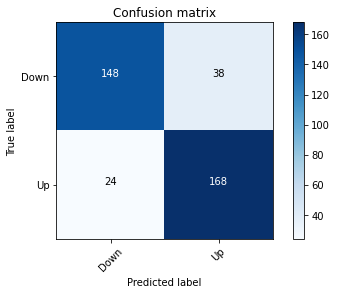

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

MultiNB+tfid

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

MultinomialNB()

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

Confusion matrix, without normalization


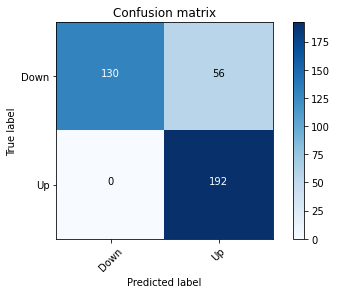

In [ ]:
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

PassiveAggresive classifier+tfid

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier(C=0.5,random_state=5)
pa.fit(train_df,train['Label'])

PassiveAggressiveClassifier(C=0.5, random_state=5)

[[145  41]
 [ 14 178]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       186
           1       0.81      0.93      0.87       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378

Confusion matrix, without normalization


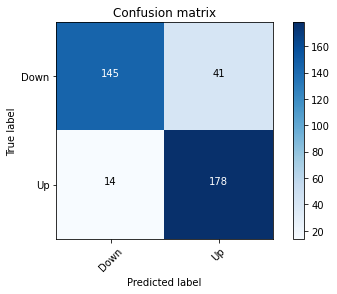

In [ ]:
predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

## **Inference**

Best accuracy was achieved with TFID+PassiveAggresive Model-85.4% and BagOfWords+RandomForest(86.24%)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx

In [ ]:
import keras
sequenceLength = 200
kTokenizer = keras.preprocessing.text.Tokenizer()
kTokenizer.fit_on_texts(headlines)
encoded_docs = kTokenizer.texts_to_sequences(headlines)
Xencoded = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=sequenceLength, padding='post')


In [ ]:
validatn=headlines_tst[150:]
kTokenizer.fit_on_texts(validatn)
encoded_docs_vald = kTokenizer.texts_to_sequences(validatn)
Xencoded_vald = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=sequenceLength, padding='post')


In [ ]:
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))
valid_df=tfvector.fit_transform(validatn)

In [ ]:
valid_y=test['Label']
valid_y=valid_y[150:]
len(valid_y)

228

In [ ]:
# A simple LSTM model
model = keras.models.Sequential()
if (vectorSource != 'none'):
    embedding_matrix = getEmbeddingMatrix (kTokenizer.word_index, vectorSource)
    embedding = keras.layers.embeddings.Embedding(input_dim=len(kTokenizer.word_index)+1, output_dim=300, weights=[embedding_matrix], input_length=sequenceLength, trainable=False, mask_zero=True)
else:
    embedding = keras.layers.embeddings.Embedding(input_dim=len(kTokenizer.word_index)+1, output_dim=300, input_length=sequenceLength, trainable=True, mask_zero=True)
model.add(embedding)
model.add(keras.layers.LSTM(units=150, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(keras.layers.Dense(numClasses, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# A simple LSTM model
model = keras.models.Sequential()

embedding = keras.layers.embeddings.Embedding(input_dim=len(kTokenizer.word_index)+1, output_dim=300, input_length=sequenceLength, trainable=True, mask_zero=True)
model.add(embedding)
model.add(keras.layers.LSTM(units=150, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.fit(x=train_df, y=train['Label'], epochs=5, batch_size=32, shuffle=True, validation_data = (valid_df, valid_y), verbose=2)

Epoch 1/5


ValueError: ignored

In [ ]:
from keras.utils import np_utils

train_labels = keras.utils.np_utils.to_categorical(labels[train_indices], len(labelToName))
test_labels = keras.utils.to_categorical(labels[test_indices], len(labelToName))
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=False)
history = model.fit(x=train_x, y=train_labels, epochs=50, batch_size=32, shuffle=True, validation_data = (test_x, test_labels), verbose=2, callbacks=[early_stop])
predicted = model.predict(test_x, verbose=2)
predicted_labels = predicted.argmax(axis=1)

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.LSTM(64,return_sequences = True, input_shape=(train_df.shape[1] , 1),dropout=0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# expected shape=(None, None, 200), found shape=(None, 37303, 1)



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1553543, 64)       16896     
                                                                 
 dense (Dense)               (None, 1553543, 1)        65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train_df,train['Label']

model.fit(train_df,train['Label'],validation_data=(test_dataset,test_dataset['Label']),epochs=5,batch_size=64)

In [ ]:
train_df

<3975x1553543 sparse matrix of type '<class 'numpy.float64'>'
	with 2167855 stored elements in Compressed Sparse Row format>

In [ ]:
model.fit(train_df, train['Label'], 
                    epochs=5, verbose=1
                    validation_split=0.1)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_df)
word_index = tokenizer.word_index


train_sequences = tokenizer.texts_to_sequences(train_df)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

AttributeError: ignored